# Hepatitis C Virus (HCV) for Egyptian patients 

### Libraries 

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set_style("whitegrid")

## Data exploration 

In [11]:
data = pd.read_csv("HCV-Egy-Data.csv")

In [12]:
data.shape

(1385, 29)

In [13]:
data.head()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
0,56,1,35,2,1,1,1,2,2,2,...,5,5,5,655330,634536,288194,5,5,13,2
1,46,1,29,1,2,2,1,2,2,1,...,57,123,44,40620,538635,637056,336804,31085,4,2
2,57,1,33,2,2,2,2,1,1,1,...,5,5,5,571148,661346,5,735945,558829,4,4
3,49,2,33,1,2,1,2,1,2,1,...,48,77,33,1041941,449939,585688,744463,582301,10,3
4,59,1,32,1,1,2,1,2,2,2,...,94,90,30,660410,738756,3731527,338946,242861,11,1


In [14]:
data.columns

Index(['Age ', 'Gender', 'BMI', 'Fever', 'Nausea/Vomting', 'Headache ',
       'Diarrhea ', 'Fatigue & generalized bone ache ', 'Jaundice ',
       'Epigastric pain ', 'WBC', 'RBC', 'HGB', 'Plat', 'AST 1', 'ALT 1',
       'ALT4', 'ALT 12', 'ALT 24', 'ALT 36', 'ALT 48', 'ALT after 24 w',
       'RNA Base', 'RNA 4', 'RNA 12', 'RNA EOT', 'RNA EF',
       'Baseline histological Grading', 'Baselinehistological staging'],
      dtype='object')

In [15]:
data.dtypes

Age                                   int64
Gender                                int64
BMI                                   int64
Fever                                 int64
Nausea/Vomting                        int64
Headache                              int64
Diarrhea                              int64
Fatigue & generalized bone ache       int64
Jaundice                              int64
Epigastric pain                       int64
WBC                                   int64
RBC                                 float64
HGB                                   int64
Plat                                float64
AST 1                                 int64
ALT 1                                 int64
ALT4                                float64
ALT 12                                int64
ALT 24                                int64
ALT 36                                int64
ALT 48                                int64
ALT after 24 w                        int64
RNA Base                        

In [16]:
data.isna().sum()

Age                                 0
Gender                              0
BMI                                 0
Fever                               0
Nausea/Vomting                      0
Headache                            0
Diarrhea                            0
Fatigue & generalized bone ache     0
Jaundice                            0
Epigastric pain                     0
WBC                                 0
RBC                                 0
HGB                                 0
Plat                                0
AST 1                               0
ALT 1                               0
ALT4                                0
ALT 12                              0
ALT 24                              0
ALT 36                              0
ALT 48                              0
ALT after 24 w                      0
RNA Base                            0
RNA 4                               0
RNA 12                              0
RNA EOT                             0
RNA EF      

In [17]:
scaler = StandardScaler()
data_scale = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

## Unsupervised learning machine 

### KMeans model

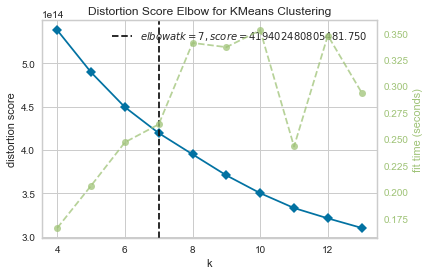

In [18]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,14))
visualizer.fit(data)
visualizer.poof()

In [19]:
kmeans = KMeans(n_clusters=8)
clusters = kmeans.fit(data_scale)
data_scale['Cluster'] = clusters.predict(data_scale)

In [20]:
data_scale['Cluster'].value_counts(sort=False)

0    201
1    167
2    194
3    200
4    144
5    178
6    159
7    142
Name: Cluster, dtype: int64

In [21]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
pca.fit(data_scale)
pca_x = pca.transform(data_scale)
pca_df = pd.DataFrame([pca_x[:, 0], pca_x[:, 1]]).T
pca_df.columns = ['PC1', 'PC2']

In [ ]:
pca_df = pd.concat([pca_df, data_scale['Cluster']], axis=1)
sns.lmplot('PC1', 'PC2', data=pca_df, hue='Cluster', fit_reg=False)

In [23]:
data['Cluster']=data_scale['Cluster']

In [24]:
data_scale.drop(columns=['Cluster'], inplace=True)
data.drop(columns=['Cluster'], inplace=True)

In [25]:
from sklearn.metrics import silhouette_score
silhouette_score(data_scale, kmeans.predict(data_scale))

0.027332664379039896

In [26]:
data.groupby('Cluster').median()

KeyError: 'Cluster'

Conclusion : Kmeans model classified patients to 8 groups of various symptoms. Low silhouette score.

Cluster 0 : Men with fever, headache, diarrhea, fatigue and epigastric pain

Cluster 1 : Men with headache, fatigue, jaundice and epigastric pain

Cluster 2 : Women with fever, diarrhea, fatigue and jaundice

Cluster 3 : Women with fever and nausea/vomiting

Cluster 4 : Men with headache, fatigue, jaundice and epigastric pain

Cluster 5 : Men with fever, nausea/vomiting and headache

Cluster 6 : Women and men with fever and epigastric pain

Cluster 7 : Men with nausea/vomiting, headache, diarrhea and jaundice

### DBscan model

In [27]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.01)
dbscan.fit(data_scale)
data_scale['Cluster2'] = dbscan.labels_

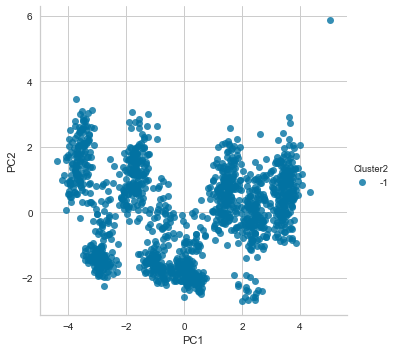

In [28]:
pca_df = pd.concat([pca_df, data_scale['Cluster2']], axis=1)
sns.lmplot('PC1', 'PC2', data=pca_df, hue='Cluster2', fit_reg=False)

In [29]:
data_scale.drop(columns=['Cluster2'], inplace=True)

Conclusion : model failed to cluster the data

### Gaussian mixture model 

In [30]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=8).fit(data_scale)
data['Cluster3']= gmm.fit_predict(data_scale)

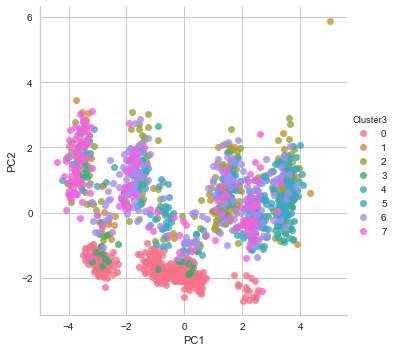

In [31]:
pca_df = pd.concat([pca_df, data['Cluster3']], axis=1)
sns.lmplot('PC1', 'PC2', data=pca_df, hue='Cluster3', fit_reg=False)

In [32]:
data.groupby('Cluster3').median()

,Age,Gender,BMI,Fever,Nausea/Vomting,Headache,Diarrhea,Fatigue & generalized bone ache,Jaundice,Epigastric pain,...,ALT 36,ALT 48,ALT after 24 w,RNA Base,RNA 4,RNA 12,RNA EOT,RNA EF,Baseline histological Grading,Baselinehistological staging
Cluster3,,,,,,,,,,,,,,,,,,,,,
0,48.0,1.0,29.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,...,82.5,84.0,34.0,588201.0,628398.0,5.0,5.0,5.0,10.0,2.0
1,45.0,2.0,27.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,...,75.5,87.5,36.0,578846.5,436794.0,484677.0,377867.5,439976.5,12.0,2.0
2,47.0,1.0,29.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,...,85.0,80.5,34.0,724466.5,560088.5,451395.5,413939.5,398367.5,8.0,3.0
3,43.0,2.0,24.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,...,84.0,72.0,31.0,582352.0,453557.0,5.0,5.0,5.0,8.0,3.0
4,49.0,1.0,28.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,...,87.0,101.0,33.0,667184.0,550257.0,531640.0,298515.0,318790.0,8.0,3.0
5,44.0,1.0,26.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,...,89.0,76.0,30.0,392976.0,451968.0,366978.0,365677.0,397676.0,11.0,3.0
6,42.0,2.0,31.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,...,80.0,80.5,34.0,487289.0,648797.0,335917.5,368959.5,398872.0,12.0,3.0
7,49.0,2.0,29.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,...,89.0,82.0,32.0,669300.0,865866.0,322058.0,455694.0,384652.0,10.0,2.0


In [33]:
data.drop(columns=['Cluster3'], inplace=True)

In [34]:
silhouette_score(data_scale, gmm.predict(data_scale), metric='euclidean')

0.006044476844277641

Conclusion : Low silhouette score, clusters imbricated, vizualisation show irrelevance